In [1]:
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 45.1 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

# **ㅡㅡㅡㅡㅡjeju_place.xlsx 파일ㅡㅡㅡㅡㅡ**

## **1. 데이터 가져오기(모듈 세팅)**

In [14]:
place = pd.read_excel('jeju_place.xlsx')

## **2. 데이터 정보 확인**

In [15]:
place.head()

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
0,1,제주국제공항,제주특별자치도,제주시,제주 제주시 공항로 2-0,기타관광,교통시설,803524
1,2,동문재래시장,제주특별자치도,제주시,제주 제주시 관덕로14길 20-0,쇼핑,시장,301089
2,3,서귀포매일올레시장,제주특별자치도,서귀포시,제주 서귀포시 중앙로62번길 18-0,쇼핑,시장,267930
3,4,함덕해수욕장,제주특별자치도,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477
4,5,성산일출봉,제주특별자치도,서귀포시,제주 서귀포시 일출로 284-12,자연관광,자연경관(산),195037


In [16]:
place.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   순위        500 non-null    int64 
 1   관광지명      500 non-null    object
 2   광역시/도     500 non-null    object
 3   시/군/구     500 non-null    object
 4   도로명주소     500 non-null    object
 5   중분류 카테고리  500 non-null    object
 6   소분류 카테고리  500 non-null    object
 7   검색건수      500 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [17]:
place.describe()

,순위,검색건수
count,500.000000,500.0000
mean,250.472000,18153.8080
std,144.450064,46217.1129
min,1.000000,1895.0000
25%,125.750000,3565.0000
50%,250.500000,6894.5000
75%,375.250000,14538.2500
max,500.000000,803524.0000


## **3. 데이터 전처리**

In [18]:
# '순위'를 index로 설정
place = place.set_index('순위')
place.head()

,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
순위,,,,,,,
1,제주국제공항,제주특별자치도,제주시,제주 제주시 공항로 2-0,기타관광,교통시설,803524
2,동문재래시장,제주특별자치도,제주시,제주 제주시 관덕로14길 20-0,쇼핑,시장,301089
3,서귀포매일올레시장,제주특별자치도,서귀포시,제주 서귀포시 중앙로62번길 18-0,쇼핑,시장,267930
4,함덕해수욕장,제주특별자치도,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477
5,성산일출봉,제주특별자치도,서귀포시,제주 서귀포시 일출로 284-12,자연관광,자연경관(산),195037


In [19]:
# '광역시/도'는 전부 같은 값 -> drop
place['광역시/도'].unique()

array(['제주특별자치도'], dtype=object)

In [20]:
place = place.drop('광역시/도', axis=1)
place.head()

,관광지명,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
순위,,,,,,
1,제주국제공항,제주시,제주 제주시 공항로 2-0,기타관광,교통시설,803524
2,동문재래시장,제주시,제주 제주시 관덕로14길 20-0,쇼핑,시장,301089
3,서귀포매일올레시장,서귀포시,제주 서귀포시 중앙로62번길 18-0,쇼핑,시장,267930
4,함덕해수욕장,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477
5,성산일출봉,서귀포시,제주 서귀포시 일출로 284-12,자연관광,자연경관(산),195037


In [21]:
# 장소데이터 -> 중분류 여러 개 -> drop X -> 중분류 기준으로 데이터를 나눠볼 순 있다.
place['중분류 카테고리'].unique()

array(['기타관광', '쇼핑', '자연관광', '문화관광', '레저스포츠', '체험관광', '역사관광'],
      dtype=object)

## **4. 데이터 시각화**

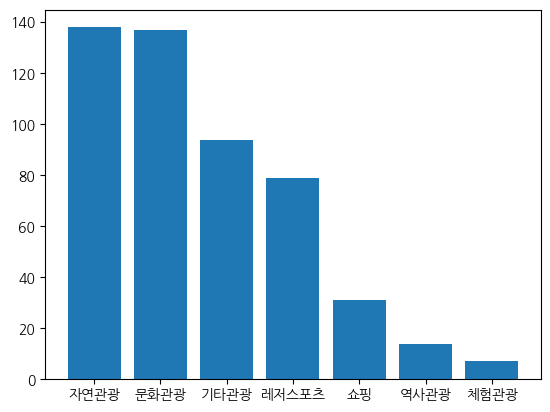

In [24]:
mid_cat = place['중분류 카테고리'].value_counts() # 제주도 관광지 검색 중 자연관광 영역이 가장 많이 검색됨
plt.bar(mid_cat.index, mid_cat)
plt.show()

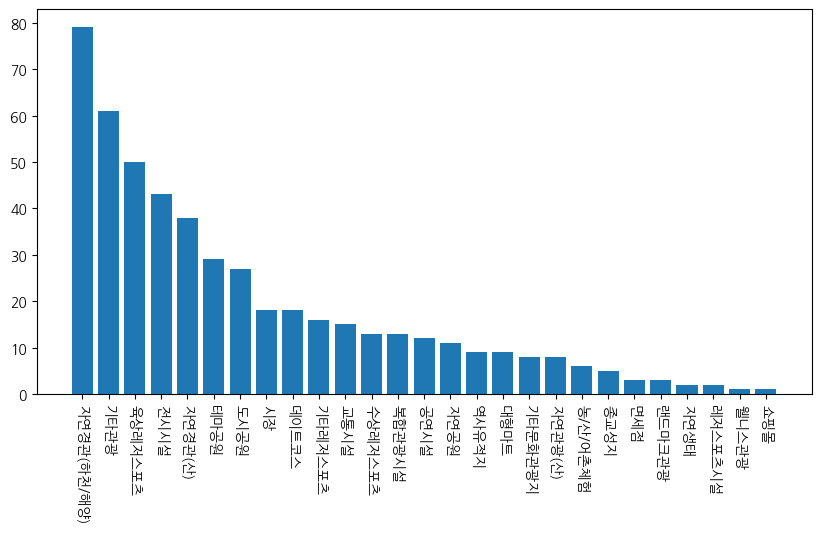

In [29]:
low_cat = place['소분류 카테고리'].value_counts()
plt.figure(figsize=(10,5))
plt.xticks(rotation=-90)
plt.bar(low_cat.index, low_cat)
plt.show()

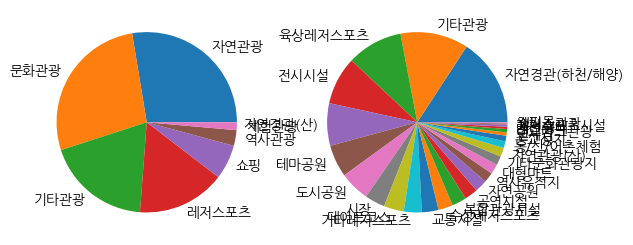

In [33]:
# pie chart : 전체에서 부분이 어느정도 차지하고 있느냐

# 중분류
plt.subplot(1,2,1)
plt.pie(mid_cat, labels=mid_cat.index)

# 소분류
plt.subplot(1,2,2)
plt.pie(low_cat, labels=low_cat.index)

plt.show()

In [55]:
# 소분류 카테고리 -> 상위 10개 값만 이용
place[place['소분류 카테고리'].isin(low_cat.index[:10])]

,관광지명,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
순위,,,,,,
2,동문재래시장,제주시,제주 제주시 관덕로14길 20-0,쇼핑,시장,301089
3,서귀포매일올레시장,서귀포시,제주 서귀포시 중앙로62번길 18-0,쇼핑,시장,267930
4,함덕해수욕장,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477
5,성산일출봉,서귀포시,제주 서귀포시 일출로 284-12,자연관광,자연경관(산),195037
6,협재해수욕장,제주시,제주 제주시,자연관광,자연경관(하천/해양),186252
...,...,...,...,...,...,...
491,새미은총의동산,제주시,제주 제주시,문화관광,도시공원,1936
492,금능해안도로,제주시,제주 제주시,기타관광,데이트코스,1923
495,조천만세동산,제주시,제주 제주시,문화관광,도시공원,1913


In [43]:
# 소분류 카테고리 - 자연경관(하천/해양)
nature = place[place['소분류 카테고리']=='자연경관(하천/해양)']
nature

,관광지명,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
순위,,,,,,
4,함덕해수욕장,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477
6,협재해수욕장,제주시,제주 제주시,자연관광,자연경관(하천/해양),186252
7,이호테우해변,제주시,제주 제주시,자연관광,자연경관(하천/해양),134970
10,곽지해수욕장,제주시,제주 제주시,자연관광,자연경관(하천/해양),111702
22,김녕해수욕장,제주시,제주 제주시 해맞이해안로 7-6,자연관광,자연경관(하천/해양),78488
...,...,...,...,...,...,...
455,하효항,서귀포시,제주 서귀포시 쇠소깍로 0-0,자연관광,자연경관(하천/해양),2292
474,구두미포구,서귀포시,제주 서귀포시,자연관광,자연경관(하천/해양),2068
483,제주항,제주시,제주 제주시 임항로 97-0,자연관광,자연경관(하천/해양),1997


In [56]:
nature['검색건수'].sum()

1742995

In [58]:
nature['관광지명'].unique()

array(['함덕해수욕장', '협재해수욕장', '이호테우해변', '곽지해수욕장', '김녕해수욕장', '금능해수욕장',
       '중문색달해변', '월정리해변', '표선해수욕장', '성산항', '광치기해변', '사계해수욕장', '세화해수욕장',
       '운진항', '판포포구', '모슬포항', '제주항제6부두', '삼양해수욕장', '제주항제4부두', '애월항',
       '황우지해안', '화순금모래해변', '법환포구', '한담해변', '하우목동항', '한림항', '홍조단괴해빈',
       '논짓물', '검멀레해수욕장', '도두항', '천진항', '구엄리돌염전', '서귀포항', '위미항', '하도해수욕장',
       '평대리해수욕장', '신양섭지해수욕장', '코난비치', '비양도', '오조포구', '제주항제2부두', '제주항제3부두',
       '보목포구', '신창풍차해안', '가파도', '화순항', '하고수동해수욕장', '대평포구', '사계항', '차귀도',
       '신도포구', '강정포구', '코난해변', '용수리포구', '제주항제9부두', '월령포구', '자구내포구',
       '구엄포구', '종달리해변', '제주항제7부두', '하모해수욕장', '세기알해변', '고내포구', '차귀도포구',
       '쇠소깍해변', '월평포구', '대포포구', '남원포구', '신흥해수욕장', '영락리방파제', '용담포구',
       '소금막해변', '수산저수지', '신창항', '하효항', '구두미포구', '제주항', '김녕포구', '동일리포구'],
      dtype=object)

In [68]:
# 관광지 초점 -> 항구, 포구, 염점 ... 제외 -> 해수욕장만 남김

# '항' 삭제
nature = nature.drop(labels=nature[nature['관광지명'].str[-1]=='항'].index, axis=0)

# '포구' 삭제
nature = nature.drop(labels=nature[nature['관광지명'].str[-2:]=='포구'].index, axis=0)

# '부두' 삭제
nature = nature.drop(labels=nature[nature['관광지명'].str[-2:]=='부두'].index, axis=0)

# '염전' 삭제
nature = nature.drop(labels=nature[nature['관광지명'].str[-2:]=='염전'].index, axis=0)

# '저수지' 삭제
nature = nature.drop(labels=nature[nature['관광지명'].str[-3:]=='저수지'].index, axis=0)

# '방파제' 삭제
nature = nature.drop(labels=nature[nature['관광지명'].str[-3:]=='방파제'].index, axis=0)

nature['관광지명'].unique()

nature

,관광지명,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
순위,,,,,,
4,함덕해수욕장,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477
6,협재해수욕장,제주시,제주 제주시,자연관광,자연경관(하천/해양),186252
7,이호테우해변,제주시,제주 제주시,자연관광,자연경관(하천/해양),134970
10,곽지해수욕장,제주시,제주 제주시,자연관광,자연경관(하천/해양),111702
22,김녕해수욕장,제주시,제주 제주시 해맞이해안로 7-6,자연관광,자연경관(하천/해양),78488
23,금능해수욕장,제주시,제주 제주시 금능길 119-10,자연관광,자연경관(하천/해양),77609
29,중문색달해변,서귀포시,제주 서귀포시 중문관광로72번길 0-0,자연관광,자연경관(하천/해양),61889
32,월정리해변,제주시,제주 제주시,자연관광,자연경관(하천/해양),58431
33,표선해수욕장,서귀포시,제주 서귀포시,자연관광,자연경관(하천/해양),56866


In [69]:
nature.describe()

,검색건수
count,35.000000
mean,37293.314286
std,50415.449007
min,2751.000000
25%,6737.000000
50%,13206.000000
75%,53093.000000
max,195477.000000


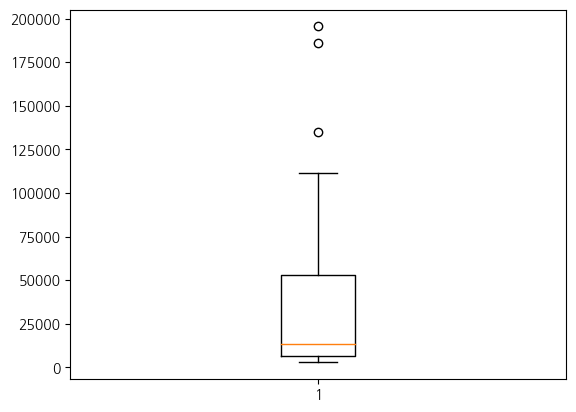

In [70]:
# q1, q2, q3 * 1.5 -> 초과: 이상치 -> 검색량이 너무 많다

plt.boxplot(nature['검색건수'])
plt.show()

In [77]:
# 상위 경계값 -> 혼잡도가 높다
upper_IQR = 53093 + (53093 - 6737) * 1.5
upper_IQR

122627.0

In [73]:
import numpy as np

# 상위 경계값을 초과하는 값들을 지워주기 위한 컬럼 추가
nature['혼잡도'] = np.where(nature['검색건수'] > upper_IQR, '혼잡', '보통')
nature  # 놀 수 있는 바다에 대한 순위 정보

,관광지명,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수,혼잡도
순위,,,,,,,
4,함덕해수욕장,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477,혼잡
6,협재해수욕장,제주시,제주 제주시,자연관광,자연경관(하천/해양),186252,혼잡
7,이호테우해변,제주시,제주 제주시,자연관광,자연경관(하천/해양),134970,혼잡
10,곽지해수욕장,제주시,제주 제주시,자연관광,자연경관(하천/해양),111702,보통
22,김녕해수욕장,제주시,제주 제주시 해맞이해안로 7-6,자연관광,자연경관(하천/해양),78488,보통
23,금능해수욕장,제주시,제주 제주시 금능길 119-10,자연관광,자연경관(하천/해양),77609,보통
29,중문색달해변,서귀포시,제주 서귀포시 중문관광로72번길 0-0,자연관광,자연경관(하천/해양),61889,보통
32,월정리해변,제주시,제주 제주시,자연관광,자연경관(하천/해양),58431,보통
33,표선해수욕장,서귀포시,제주 서귀포시,자연관광,자연경관(하천/해양),56866,보통


In [78]:
# 제주시/서귀포시 바다
nature['시/군/구'].value_counts()

제주시     23
서귀포시    12
Name: 시/군/구, dtype: int64

In [81]:
jeju = nature[nature['시/군/구']=='제주시']
jeju.head()

,관광지명,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수,혼잡도
순위,,,,,,,
4,함덕해수욕장,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477,혼잡
6,협재해수욕장,제주시,제주 제주시,자연관광,자연경관(하천/해양),186252,혼잡
7,이호테우해변,제주시,제주 제주시,자연관광,자연경관(하천/해양),134970,혼잡
10,곽지해수욕장,제주시,제주 제주시,자연관광,자연경관(하천/해양),111702,보통
22,김녕해수욕장,제주시,제주 제주시 해맞이해안로 7-6,자연관광,자연경관(하천/해양),78488,보통


In [82]:
seo = nature[nature['시/군/구']=='서귀포시']
seo.head()

,관광지명,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수,혼잡도
순위,,,,,,,
29,중문색달해변,서귀포시,제주 서귀포시 중문관광로72번길 0-0,자연관광,자연경관(하천/해양),61889,보통
33,표선해수욕장,서귀포시,제주 서귀포시,자연관광,자연경관(하천/해양),56866,보통
40,광치기해변,서귀포시,제주 서귀포시,자연관광,자연경관(하천/해양),49320,보통
43,사계해수욕장,서귀포시,제주 서귀포시,자연관광,자연경관(하천/해양),48751,보통
105,황우지해안,서귀포시,제주 서귀포시,자연관광,자연경관(하천/해양),17177,보통


In [89]:
# groupby

groupby_city = nature.groupby('시/군/구')['검색건수'].sum()
groupby_city

시/군/구
서귀포시     289143
제주시     1016123
Name: 검색건수, dtype: int64

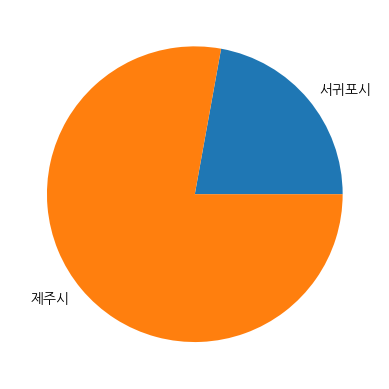

In [90]:
# nature 검색수 안에서 제주시, 서귀포시가 어느정도 검색량을 차지하고 있는지
labels = ['서귀포시', '제주시']
plt.pie(groupby_city, labels=labels)
plt.show()

# **ㅡㅡㅡㅡㅡㅡregion.csv 파일ㅡㅡㅡㅡㅡㅡ**

## **1. 데이터 가져오기(모듈 세팅)**

In [91]:
region = pd.read_csv('region.csv')

## **2. 데이터 정보 확인**

In [92]:
region.head()

,day,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,검역,총확진자수
0,2020-03-01,82,81,2569,6,9,13,17,1,84,7,11,60,5,3,514,62,2,0,3526
1,2020-03-02,91,88,3081,7,9,14,20,1,92,19,11,78,6,5,624,64,2,0,4212
2,2020-03-03,98,90,3601,7,11,14,20,1,94,20,11,81,7,5,685,64,3,0,4812
3,2020-03-04,99,93,4006,9,13,15,23,1,101,21,11,82,7,5,774,65,3,0,5328
4,2020-03-05,103,92,4326,9,14,16,23,1,110,23,12,86,7,5,861,74,4,0,5766


In [93]:
region.tail()

,day,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,검역,총확진자수
27,2020-03-28,390,114,6587,51,20,31,39,44,433,32,41,126,10,8,1285,91,8,168,9478
28,2020-03-29,410,117,6610,58,20,34,39,46,448,34,41,127,12,9,1287,94,8,189,9583
29,2020-03-30,426,118,6624,58,20,34,39,46,463,36,44,127,13,9,1298,95,9,202,9661
30,2020-03-31,450,119,6684,64,20,36,39,46,476,36,44,128,13,9,1300,96,9,217,9786
31,2020-04-01,474,122,6704,69,24,36,39,46,499,38,44,131,14,12,1302,100,9,224,9887


In [94]:
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   day     32 non-null     object
 1   서울      32 non-null     int64 
 2   부산      32 non-null     int64 
 3   대구      32 non-null     int64 
 4   인천      32 non-null     int64 
 5   광주      32 non-null     int64 
 6   대전      32 non-null     int64 
 7   울산      32 non-null     int64 
 8   세종      32 non-null     int64 
 9   경기      32 non-null     int64 
 10  강원      32 non-null     int64 
 11  충북      32 non-null     int64 
 12  충남      32 non-null     int64 
 13  전북      32 non-null     int64 
 14  전남      32 non-null     int64 
 15  경북      32 non-null     int64 
 16  경남      32 non-null     int64 
 17  제주      32 non-null     int64 
 18  검역      32 non-null     int64 
 19  총확진자수   32 non-null     int64 
dtypes: int64(19), object(1)
memory usage: 5.1+ KB


In [96]:
region.describe()

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,검역,총확진자수
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,252.875000,104.031250,5708.000000,30.468750,16.312500,22.718750,30.093750,27.750000,262.625000,28.312500,29.406250,109.937500,8.656250,5.656250,1116.750000,84.125000,4.750000,50.031250,7892.500000
std,119.194541,9.888032,1092.033587,18.268578,3.430767,6.456976,7.077267,18.949849,131.360806,5.716064,10.585624,17.586537,2.252015,2.103904,207.187308,9.338612,1.934408,76.012089,1661.291686
min,82.000000,81.000000,2569.000000,6.000000,9.000000,13.000000,17.000000,1.000000,84.000000,7.000000,11.000000,60.000000,5.000000,3.000000,514.000000,62.000000,2.000000,0.000000,3526.000000
25%,127.500000,96.000000,5523.500000,9.000000,14.750000,18.000000,24.000000,5.250000,149.250000,27.750000,24.750000,101.000000,7.000000,4.000000,1100.500000,83.000000,4.000000,0.000000,7320.000000
50%,259.000000,107.000000,6082.000000,30.500000,16.000000,22.000000,28.000000,40.000000,246.500000,29.000000,31.000000,115.000000,7.000000,5.000000,1166.500000,85.500000,4.000000,5.000000,8278.000000
75%,337.250000,111.250000,6445.500000,41.250000,19.000000,24.000000,36.250000,42.500000,371.250000,30.250000,38.000000,120.750000,10.000000,6.500000,1258.250000,90.000000,4.500000,75.500000,9062.000000
max,474.000000,122.000000,6704.000000,69.000000,24.000000,36.000000,39.000000,46.000000,499.000000,38.000000,44.000000,131.000000,14.000000,12.000000,1302.000000,100.000000,9.000000,224.000000,9887.000000


## **3. 데이터 전처리**

In [97]:
region = region.set_index('day')
region.head()

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,검역,총확진자수
day,,,,,,,,,,,,,,,,,,,
2020-03-01,82,81,2569,6,9,13,17,1,84,7,11,60,5,3,514,62,2,0,3526
2020-03-02,91,88,3081,7,9,14,20,1,92,19,11,78,6,5,624,64,2,0,4212
2020-03-03,98,90,3601,7,11,14,20,1,94,20,11,81,7,5,685,64,3,0,4812
2020-03-04,99,93,4006,9,13,15,23,1,101,21,11,82,7,5,774,65,3,0,5328
2020-03-05,103,92,4326,9,14,16,23,1,110,23,12,86,7,5,861,74,4,0,5766


In [98]:
region.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 2020-03-01 to 2020-04-01
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   서울      32 non-null     int64
 1   부산      32 non-null     int64
 2   대구      32 non-null     int64
 3   인천      32 non-null     int64
 4   광주      32 non-null     int64
 5   대전      32 non-null     int64
 6   울산      32 non-null     int64
 7   세종      32 non-null     int64
 8   경기      32 non-null     int64
 9   강원      32 non-null     int64
 10  충북      32 non-null     int64
 11  충남      32 non-null     int64
 12  전북      32 non-null     int64
 13  전남      32 non-null     int64
 14  경북      32 non-null     int64
 15  경남      32 non-null     int64
 16  제주      32 non-null     int64
 17  검역      32 non-null     int64
 18  총확진자수   32 non-null     int64
dtypes: int64(19)
memory usage: 5.0+ KB


In [99]:
# index 타입 변경
region.index = pd.to_datetime(region.index, format='%Y-%m-%d')
region.head()

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,검역,총확진자수
day,,,,,,,,,,,,,,,,,,,
2020-03-01,82,81,2569,6,9,13,17,1,84,7,11,60,5,3,514,62,2,0,3526
2020-03-02,91,88,3081,7,9,14,20,1,92,19,11,78,6,5,624,64,2,0,4212
2020-03-03,98,90,3601,7,11,14,20,1,94,20,11,81,7,5,685,64,3,0,4812
2020-03-04,99,93,4006,9,13,15,23,1,101,21,11,82,7,5,774,65,3,0,5328
2020-03-05,103,92,4326,9,14,16,23,1,110,23,12,86,7,5,861,74,4,0,5766


In [100]:
region.info()   # DatetimeIndex 로 바뀜

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 2020-03-01 to 2020-04-01
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   서울      32 non-null     int64
 1   부산      32 non-null     int64
 2   대구      32 non-null     int64
 3   인천      32 non-null     int64
 4   광주      32 non-null     int64
 5   대전      32 non-null     int64
 6   울산      32 non-null     int64
 7   세종      32 non-null     int64
 8   경기      32 non-null     int64
 9   강원      32 non-null     int64
 10  충북      32 non-null     int64
 11  충남      32 non-null     int64
 12  전북      32 non-null     int64
 13  전남      32 non-null     int64
 14  경북      32 non-null     int64
 15  경남      32 non-null     int64
 16  제주      32 non-null     int64
 17  검역      32 non-null     int64
 18  총확진자수   32 non-null     int64
dtypes: int64(19)
memory usage: 5.0 KB


In [101]:
# null값 유무 확인
region.isnull().sum()

서울       0
부산       0
대구       0
인천       0
광주       0
대전       0
울산       0
세종       0
경기       0
강원       0
충북       0
충남       0
전북       0
전남       0
경북       0
경남       0
제주       0
검역       0
총확진자수    0
dtype: int64

## **4. 데이터 시각화**

In [122]:
total = region.loc[:, '총확진자수']
total.head()

day
2020-03-01    3526
2020-03-02    4212
2020-03-03    4812
2020-03-04    5328
2020-03-05    5766
Name: 총확진자수, dtype: int64

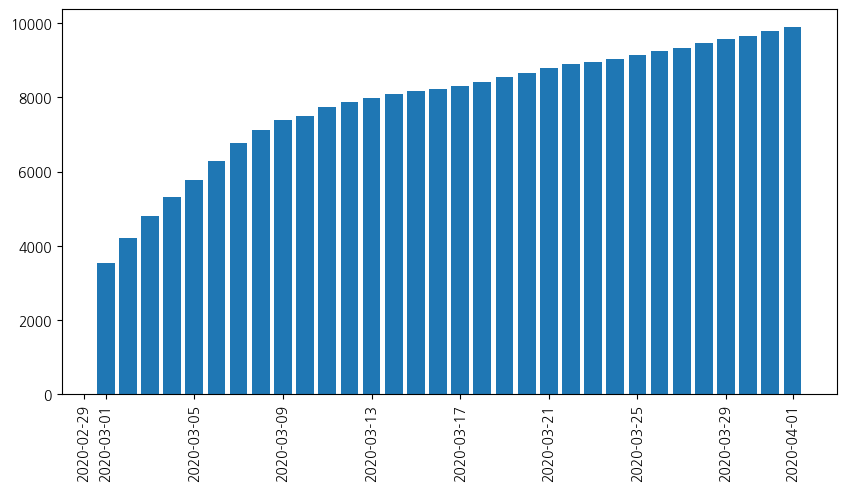

In [128]:
plt.figure(figsize=(10,5))
plt.bar(total.index, total)
plt.xticks(rotation=90)
plt.show()

In [123]:
# 전국 확진자수
cities = region.loc[:, region.columns[:-1]]
cities.head()

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,검역
day,,,,,,,,,,,,,,,,,,
2020-03-01,82,81,2569,6,9,13,17,1,84,7,11,60,5,3,514,62,2,0
2020-03-02,91,88,3081,7,9,14,20,1,92,19,11,78,6,5,624,64,2,0
2020-03-03,98,90,3601,7,11,14,20,1,94,20,11,81,7,5,685,64,3,0
2020-03-04,99,93,4006,9,13,15,23,1,101,21,11,82,7,5,774,65,3,0
2020-03-05,103,92,4326,9,14,16,23,1,110,23,12,86,7,5,861,74,4,0


In [132]:
cities.columns

Index(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남',
       '전북', '전남', '경북', '경남', '제주', '검역'],
      dtype='object')

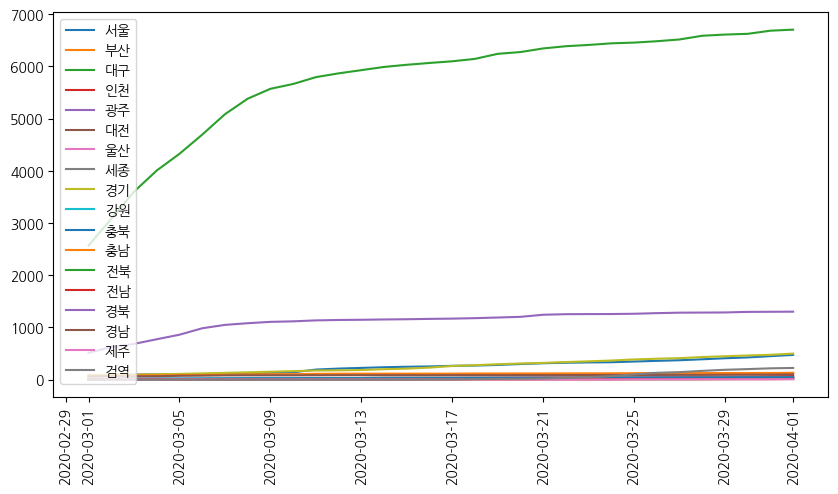

In [134]:
# 지역별 그래프
# 지역(y)만 다르고 인덱스(x) 동일
# 하나의 영역 안에 여러 그래프

plt.figure(figsize=(10,5))
plt.xticks(rotation=90)

# ['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남',
#        '전북', '전남', '경북', '경남', '제주', '검역']
plt.plot(cities, label=cities.columns)

plt.legend(loc='upper left')

plt.show()

In [140]:
cities.index

DatetimeIndex(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
               '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
               '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
               '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
               '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
               '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
               '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01'],
              dtype='datetime64[ns]', name='day', freq=None)

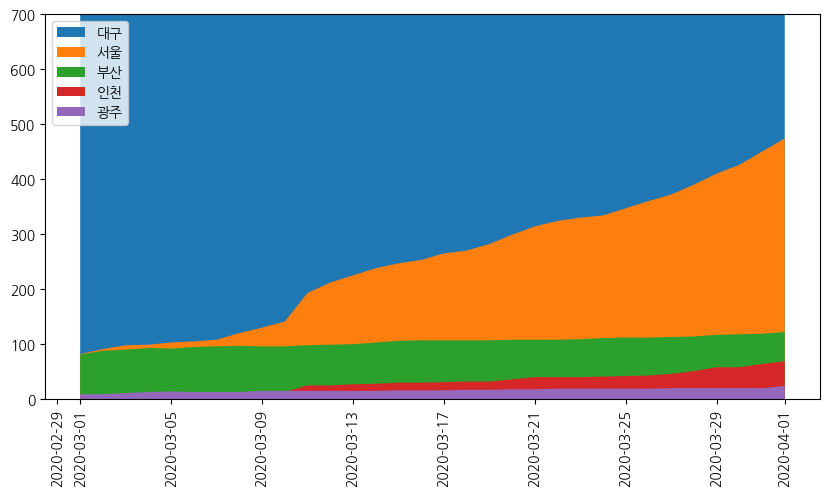

In [162]:
# 누적 그래프
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)

y1 = cities['서울']
y2 = cities['대구']
y3 = cities['부산']
y4 = cities['인천']
y5 = cities['광주']

# 겹쳐져서 나타나짐
plt.stackplot(cities.index, y2, labels=["대구"])
plt.stackplot(cities.index, y1, labels=["서울"])
plt.stackplot(cities.index, y3, labels=["부산"])
plt.stackplot(cities.index, y4, labels=["인천"])
plt.stackplot(cities.index, y5, labels=["광주"])
plt.legend(loc='upper left')

plt.ylim([0,700])

plt.show()

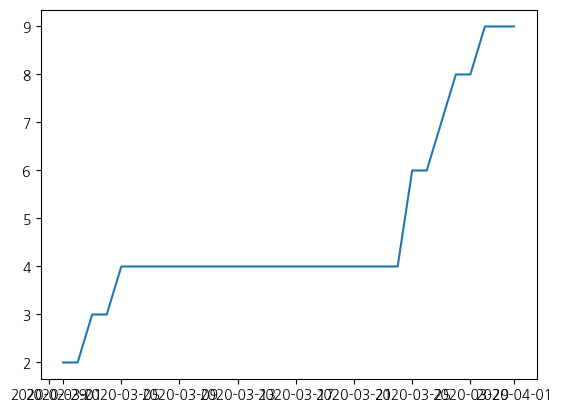

In [178]:
# 제주 데이터
jeju = region['제주']

# annotation
# plt.annotate('change', (0.1,0.1))

plt.plot(jeju)
plt.show()

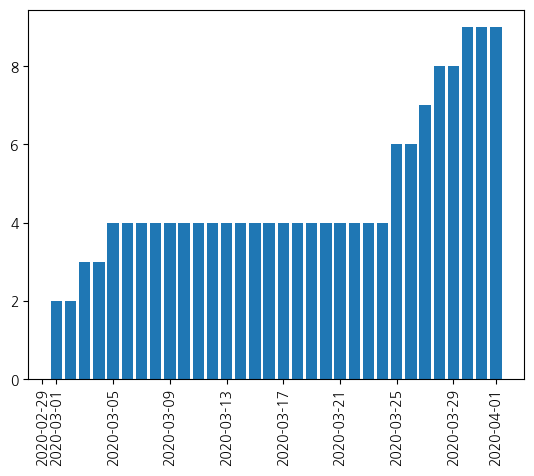

In [170]:
plt.xticks(rotation=90)
plt.bar(jeju.index, jeju)

plt.show()

In [ ]:
## 변화폭을 민감하게 살펴보자 (인사이트 도출!)
# 마스크 해지 -> 감염이 얼마나 증가 감소
# 코로나, 폐렴, 독감

In [179]:
# 위도: latitued, 경도: longitude
loc = {
  '서울' : [37.566418, 126.977950],#서울시청
  '부산' : [35.180152, 129.074980],#부산시청
  '대구' : [35.871468, 128.601757],#대구시청
  '인천' : [37.456445, 126.705873],#인천시청
  '광주' : [35.160068, 126.851426],#광주광역시청
  '대전' : [36.350664, 127.384819],#대전시청
  '울산' : [35.539772, 129.311486],#울산시청
  '세종' : [36.480838, 127.289181],#세종시청
  '경기' : [37.275221, 127.009382],#경기도청
  '강원' : [37.885300, 127.729835],#강원(강원도청)
  '충북' : [36.635947, 127.491345],#충북도청
  '충남' : [36.658826, 126.672849],#충남도청
  '전북' : [35.820599, 127.108759],#전북도청
  '전남' : [34.816351, 126.462924],#전남도청
  '경북' : [36.574108, 128.509303],#경북도청
  '경남' : [35.238398, 128.692371],#경남도청
  '제주' : [33.3617007, 126.511657]#제주
    }
type(loc)

dict

In [185]:
loc = pd.DataFrame(loc).T
loc.columns = ['lat', 'lon']
loc

,lat,lon
서울,37.566418,126.977950
부산,35.180152,129.074980
대구,35.871468,128.601757
인천,37.456445,126.705873
광주,35.160068,126.851426
대전,36.350664,127.384819
울산,35.539772,129.311486
세종,36.480838,127.289181
경기,37.275221,127.009382
강원,37.885300,127.729835


In [186]:
# 지도 관련 라이브러리
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [187]:
import folium

In [250]:
map_osm = folium.Map(location=[loc['lat'].loc['제주'], loc['lon'].loc['제주']], zoom_start=12)
map_osm

In [195]:
# 지도 위에 해당하는 지역의 확진자수를 표시
from folium.plugins import MarkerCluster

# 마커 클러스터 사용을 위한 선언
marker_cluster = MarkerCluster().add_to(map_osm)

# folium.Marker([위도, 경도], popup=, icon=folium.Icon(color='red', icon='star')).add_to(marker_cluster)
folium.Marker([loc['lat'].loc['제주'], loc['lon'].loc['제주']], popup=cities['제주'].sum(), icon=folium.Icon(color='red', icon='star')).add_to(marker_cluster)
map_osm

In [253]:
# 각 지역별로 마커찍기
# 지역별 확진자 합(데이터 프레임)
# folium.Marker([위도, 경도], popup=지역의 확진자 합, icon=folium.Icon(color='red', icon='star')).add_to(marker_cluster)
# for문 순회

marker_cluster = MarkerCluster().add_to(map_osm)

for city in cities.columns[1:-1]:
    folium.Marker([loc['lat'].loc[city], loc['lon'].loc[city]], popup=cities[city].sum(), icon=folium.Icon(color='red', icon='star')).add_to(marker_cluster)

In [254]:
map_osm

# **ㅡㅡㅡㅡㅡㅡtotal_.csv 파일ㅡㅡㅡㅡㅡㅡ**

## **1. 데이터 가져오기(모듈 세팅)**

In [197]:
kr = pd.read_csv('total_.csv')

## **2. 데이터 정보 확인**

In [198]:
kr.head()

,date,총계,확진자,격리해제,격리중,사망,검사중,결과 음성
0,2020-03-01,96985,3526,30,3479,17,32422,61037
1,2020-03-02,109591,4212,31,4159,22,33799,71580
2,2020-03-03,125851,4812,34,4750,28,35555,85484
3,2020-03-04,136707,5328,41,5255,32,28414,102965
4,2020-03-05,146541,5766,88,5643,35,21810,118965


In [199]:
kr.tail()

,date,총계,확진자,격리해제,격리중,사망,검사중,결과 음성
27,2020-03-28,387925,9478,4811,4523,144,16564,361883
28,2020-03-29,394141,9583,5033,4398,152,15028,369530
29,2020-03-30,395194,9661,5228,4275,158,13531,372002
30,2020-03-31,410564,9786,5408,4216,162,16892,383886
31,2020-04-01,421547,9887,5567,4155,165,16585,395075


In [200]:
kr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    32 non-null     object
 1   총계      32 non-null     int64 
 2   확진자     32 non-null     int64 
 3   격리해제    32 non-null     int64 
 4   격리중     32 non-null     int64 
 5   사망      32 non-null     int64 
 6   검사중     32 non-null     int64 
 7   결과 음성   32 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 2.1+ KB


In [201]:
kr.describe()

,총계,확진자,격리해제,격리중,사망,검사중,결과 음성
count,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000
mean,272659.468750,7892.531250,1952.28125,5851.031250,86.062500,18708.312500,246058.656250
std,96168.245376,1661.299996,1962.49330,1213.763847,44.247061,5765.846459,99218.729994
min,96985.000000,3526.000000,30.00000,3479.000000,17.000000,13531.000000,61037.000000
25%,194593.000000,7320.000000,157.00000,4728.750000,50.750000,15384.750000,169335.500000
50%,280610.000000,8278.500000,1269.00000,5984.500000,78.000000,16738.500000,256201.000000
75%,350910.500000,9062.000000,3562.75000,6971.500000,121.500000,18749.000000,326699.000000
max,421547.000000,9887.000000,5567.00000,7470.000000,165.000000,35555.000000,395075.000000


## **3. 데이터 전처리**

In [202]:
kr = kr.set_index('date')
kr.head()

,총계,확진자,격리해제,격리중,사망,검사중,결과 음성
date,,,,,,,
2020-03-01,96985,3526,30,3479,17,32422,61037
2020-03-02,109591,4212,31,4159,22,33799,71580
2020-03-03,125851,4812,34,4750,28,35555,85484
2020-03-04,136707,5328,41,5255,32,28414,102965
2020-03-05,146541,5766,88,5643,35,21810,118965


In [203]:
kr.index = pd.to_datetime(kr.index, format='%Y-%m-%d')
kr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 2020-03-01 to 2020-04-01
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   총계      32 non-null     int64
 1   확진자     32 non-null     int64
 2   격리해제    32 non-null     int64
 3   격리중     32 non-null     int64
 4   사망      32 non-null     int64
 5   검사중     32 non-null     int64
 6   결과 음성   32 non-null     int64
dtypes: int64(7)
memory usage: 2.0 KB


In [204]:
kr.isnull().sum()

총계       0
확진자      0
격리해제     0
격리중      0
사망       0
검사중      0
결과 음성    0
dtype: int64

## **4. 데이터 시각화**

In [205]:
kr.head()

,총계,확진자,격리해제,격리중,사망,검사중,결과 음성
date,,,,,,,
2020-03-01,96985,3526,30,3479,17,32422,61037
2020-03-02,109591,4212,31,4159,22,33799,71580
2020-03-03,125851,4812,34,4750,28,35555,85484
2020-03-04,136707,5328,41,5255,32,28414,102965
2020-03-05,146541,5766,88,5643,35,21810,118965


In [207]:
# 확진자(양성)
kr[['확진자', '결과 음성']]

,확진자,결과 음성
date,,
2020-03-01,3526,61037
2020-03-02,4212,71580
2020-03-03,4812,85484
2020-03-04,5328,102965
2020-03-05,5766,118965
2020-03-06,6284,136624
2020-03-07,6767,151802
2020-03-08,7134,162008
2020-03-09,7382,171778


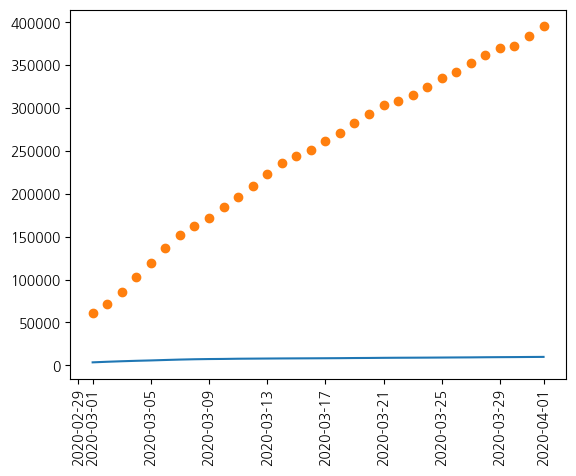

In [210]:
# 데이터 타입들 중 컬럼들이 서로 상관성이 있거나 반대 성향(경향)이 있으면 서로 비교
pos = kr['확진자']
neg = kr['결과 음성']

plt.xticks(rotation=90)
plt.plot(pos)
plt.plot(neg, 'o')

plt.show()

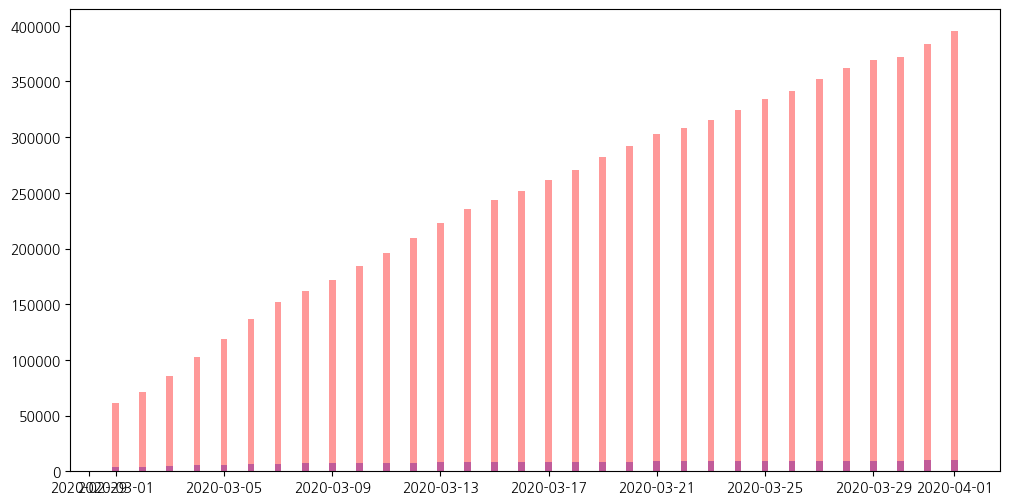

In [242]:
# 양성 음성 -> 반대되는 데이터
# 바그래프 : 가로(x) -> 시간, 세로(y) -> 수

bar_width = 0.25
fig, ax = plt.subplots(figsize=(12,6))

b1 = plt.bar(pos.index, pos, bar_width, alpha=0.4, color='blue', label='positive')
b2 = plt.bar(neg.index, neg, bar_width, alpha=0.4, color='red', label='negative')

plt.show()

In [243]:
sum_p = pos.sum()
sum_n = neg.sum()

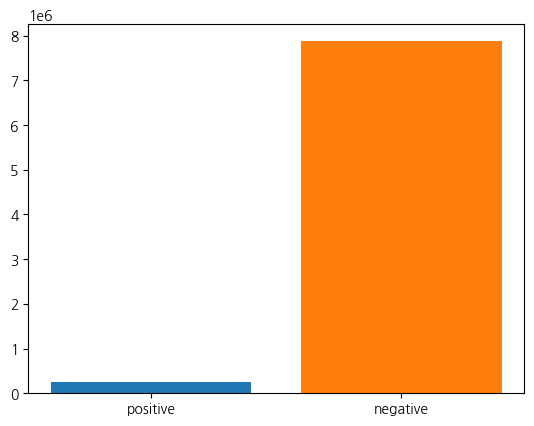

In [245]:
plt.bar('positive', sum_p)
plt.bar('negative', sum_n)
plt.show()

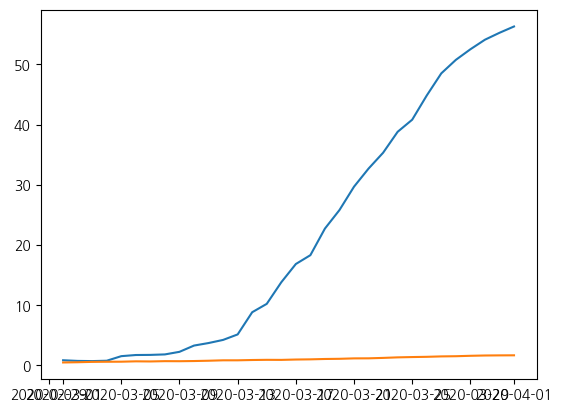

In [256]:
# 두 데이터(컬럼) 합쳐서 하나의 결과를 도출 -> 컬럼 선택

death = kr['사망']
rec = kr['격리해제']

# 완치율
# rec/pos * 100 -> 비율
rec_ratio = round((rec/pos *100), 2)

# 사망율
# death/pos * 100 -> 비율
death_ratio = round((death/pos *100), 2)


plt.plot(rec_ratio)
plt.plot(death_ratio)

plt.show()

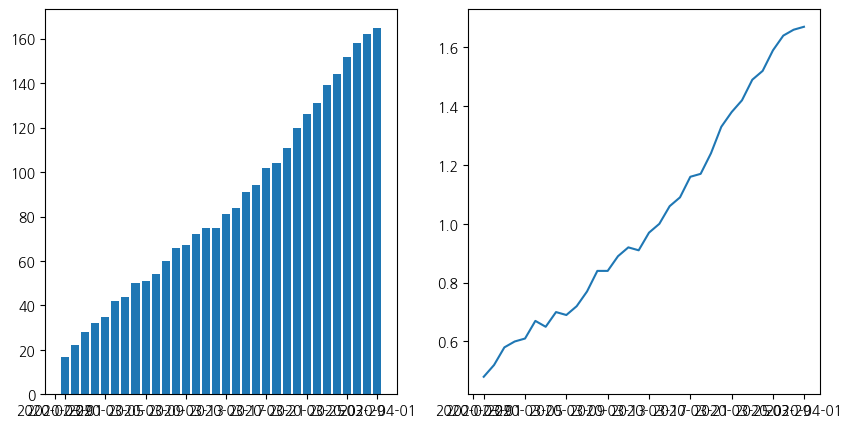

In [261]:
# 사망자 수, 치명율

death.head()
death_ratio.head()

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.bar(death.index, death)

plt.subplot(1,2,2)
plt.plot(death_ratio)

plt.show()

In [267]:
kr.head()

,총계,확진자,격리해제,격리중,사망,검사중,결과 음성
date,,,,,,,
2020-03-01,96985,3526,30,3479,17,32422,61037
2020-03-02,109591,4212,31,4159,22,33799,71580
2020-03-03,125851,4812,34,4750,28,35555,85484
2020-03-04,136707,5328,41,5255,32,28414,102965
2020-03-05,146541,5766,88,5643,35,21810,118965


In [ ]:
# 전체 - 부분
# 어떤 값이 전체에서 어느 정도 차지하고 있느냐

# 시계열 -> 변화, 흐름
# 1. 경향(성)
# 2. 비율 -> 시간 흐름에 따라 특정한 부분이 얼마나 영향을 끼치고 있는지: 흐름, 변화

# 확진자 중 사망자(얼마나), 완치자(얼마나): 일별
# 격리중, 격리 해제 비율
# 검사중 양성, 음성 비율
# 주말 전후 양성 비율 변화
# 주말 전후 검사량 변화

date
2020-03-01    17
2020-03-02    22
2020-03-03    28
2020-03-04    32
2020-03-05    35
Name: 사망, dtype: int64
date
2020-03-01    30
2020-03-02    31
2020-03-03    34
2020-03-04    41
2020-03-05    88
Name: 격리해제, dtype: int64


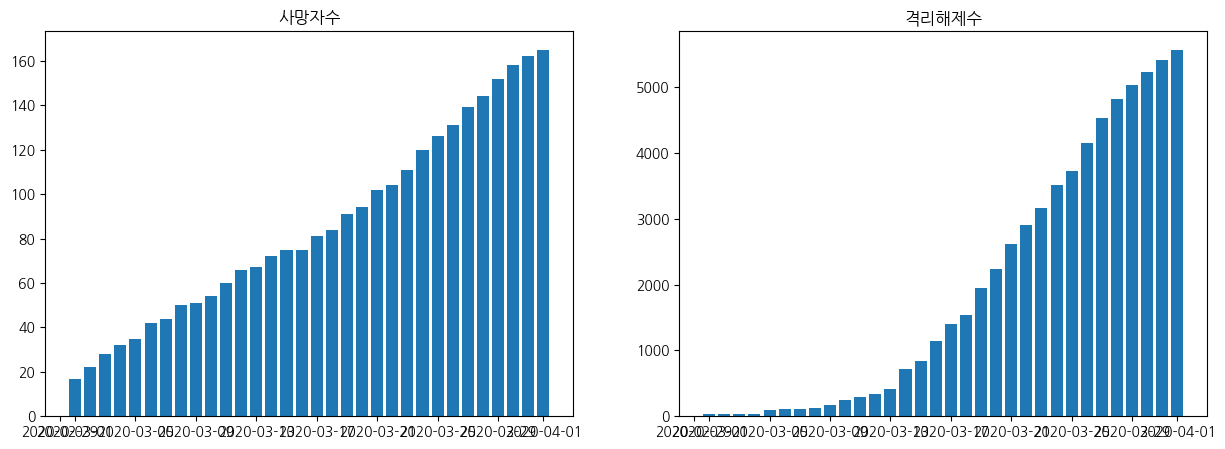

In [273]:
# 확진자 중 사망자(얼마나), 완치자(얼마나): 일별
print(death.head()) # '사망'
print(rec.head())   # '격리해제'

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('사망자수')
plt.bar(death.index, death)
# death_ratio

plt.subplot(1,2,2)
plt.title('격리해제수')
plt.bar(rec.index, rec)
# rec_ratio

plt.show()

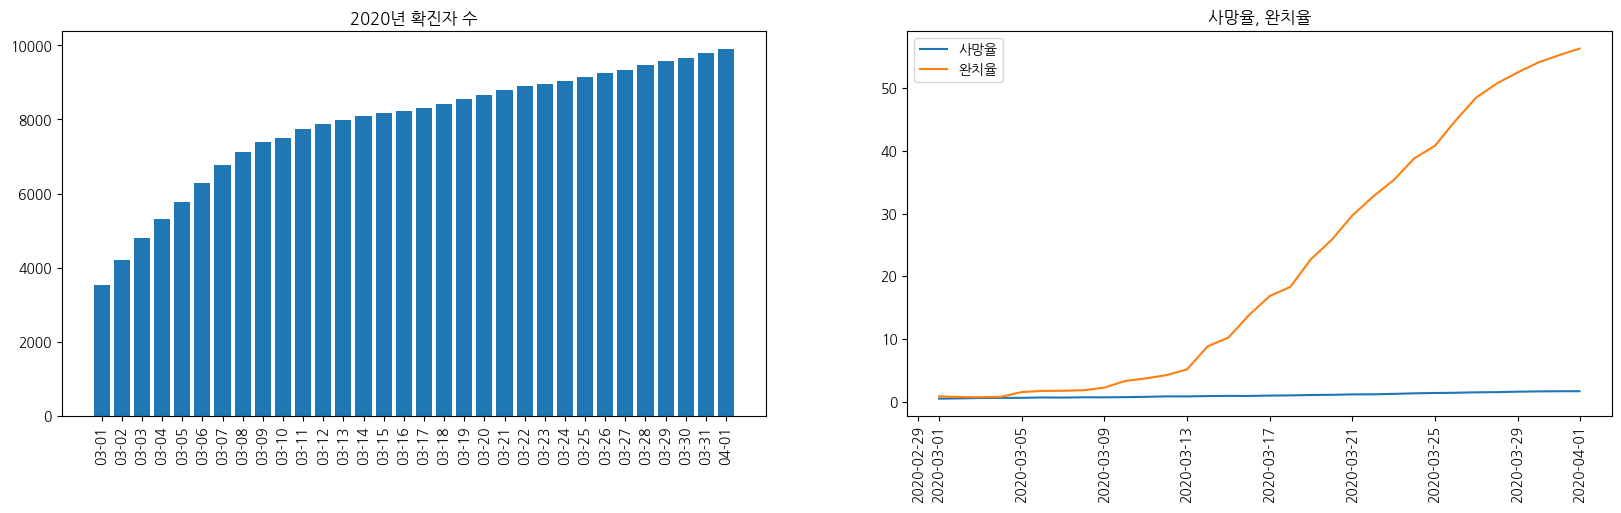

In [289]:
# 치명율, 완치율
# 확진자 바탕으로 만들어짐(pos)
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title('2020년 확진자 수')
plt.xticks(rotation=90)
plt.bar(pos.index.to_series().dt.strftime('%m-%d').values, pos)

plt.subplot(1,2,2)
plt.title('사망율, 완치율')
plt.xticks(rotation=90)
plt.plot(death_ratio, label='사망율')
plt.plot(rec_ratio, label='완치율')
plt.legend(loc='upper left')

plt.show()
# 확진자는 계속 증가한다.
# 사망, 격리해제 증가
# 확진자 증가하는 경향, 완치자(격리해제)가 증가하는 경향이 훨씬 유사하다.

## -> 정규화, 일반화: 분산, 표준편차, 정규분포 ... 